In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Build a dataset
df = pd.DataFrame({
    "Name": [f"item {i}" for i in range(1, 51)],
    "Value": np.random.randint(low=30, high=100, size=50)
})

# Show 3 first rows
df.head(3)

,Name,Value
0,item 1,85
1,item 2,38
2,item 3,30


In [116]:
ANGLES = np.linspace(0, 2 * np.pi, 50, endpoint=False)
VALUES = df["Value"].values
LABELS = df["Name"].values
WIDTH = 2 * np.pi / len(VALUES)

In [117]:
def get_label_rotation(angle, offset):
    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [118]:
def add_labels(angles, values, labels, offset, ax):
    padding = 4
    # Add labels
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        rotation, alignment = get_label_rotation(angle, offset)

        # Finally add the labels
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

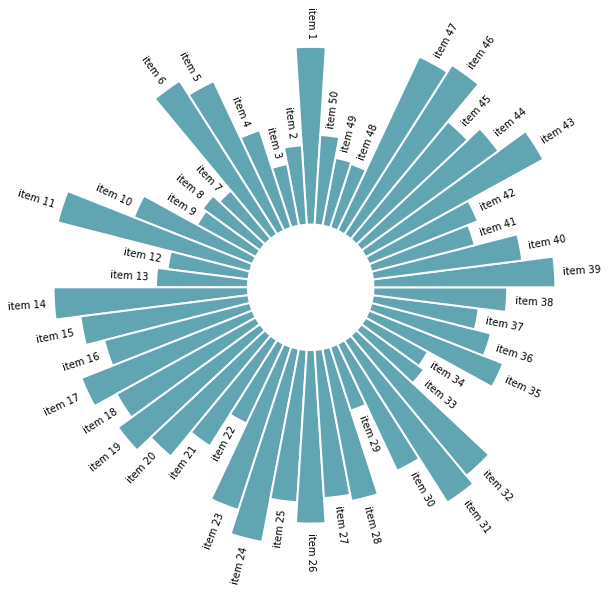

In [119]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

OFFSET = np.pi / 2
ax.set_theta_offset(OFFSET)
ax.set_ylim(-30, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars to represent ...
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

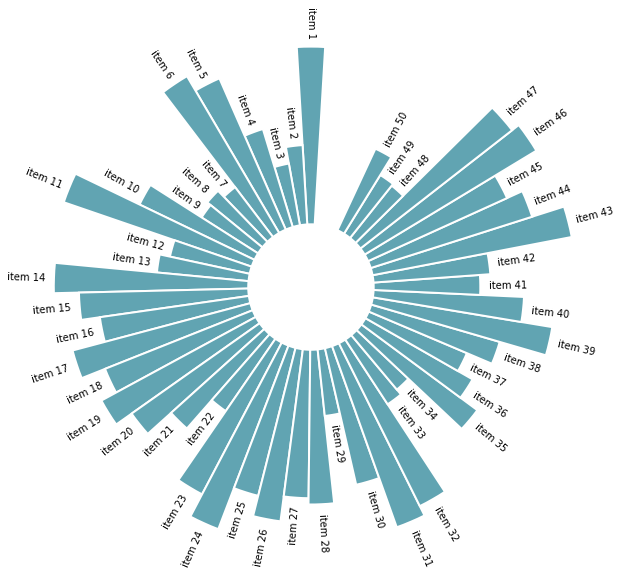

In [120]:
PCT_EMPTY = 0.06
ANGLES = np.linspace(0, (2 * np.pi) * (1 - PCT_EMPTY), 50, endpoint=False)
VALUES = df["Value"].values 
LABELS = df["Name"].values
WIDTH = (2 * np.pi * (1 - PCT_EMPTY)) / len(VALUES)

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-30, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars to represent ...
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#61a4b2", edgecolor="white"
)

add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

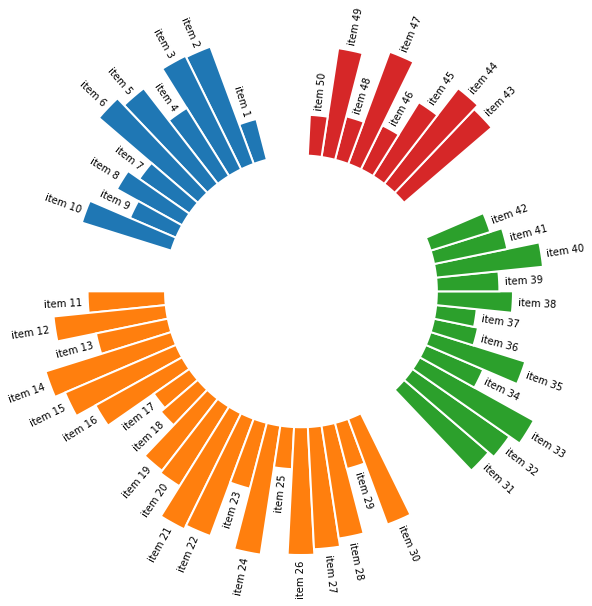

In [142]:
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": np.random.randint(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

VALUES = df["value"].values 
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

In [143]:
df = pd.DataFrame({
    "name": [f"item {i}" for i in range(1, 51)],
    "value": np.random.randint(low=30, high=100, size=50),
    "group": ["A"] * 10 + ["B"] * 20 + ["C"] * 12 + ["D"] * 8
})

# Reorder the dataframe
df = (
    df
    .groupby(["group"])
    .apply(lambda x: x.sort_values(["value"], ascending = False))
    .reset_index(drop=True)
)

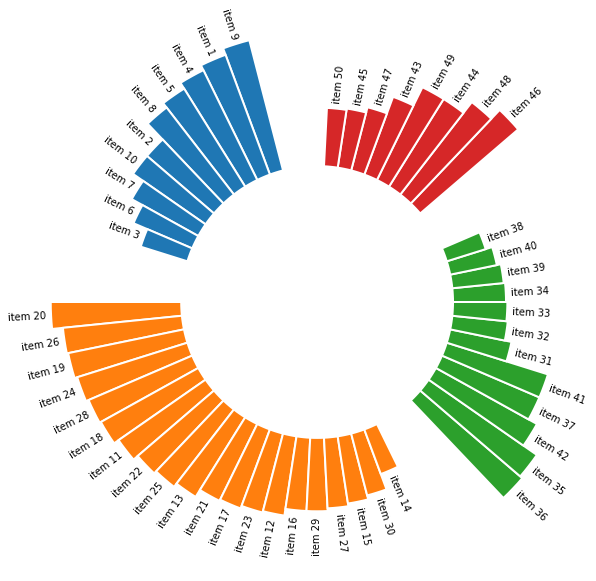

In [144]:
VALUES = df["value"].values 
LABELS = df["name"].values
GROUP = df["group"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))

ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-100, 100)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 20, 12, 8]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)